Stengiausi patyrinėti, kiek doctestai yra veiksmingi, kai atliekame didesnį projektą. 
Įsivaizduokime, kad turime užduotį, kuriai reikia funkcijos skaidymo į mažesnes. Kaip ir didesniame 
projekte, vengiu funkcijų apibrėžinėjimo pagrindiniame faile, o vietoj jų naudojų klases ir metodus. 

Spręskime [vieną uždavinį](https://projecteuler.net/problem=122). Kaip aprašyta, mus domintų, koks yra mažiausias dauginimų skaičius $M(k)$, kurio reikia norint gauti laipsnį $n^k$. Projektuose dažnai kyla situacija, kai algoritmas nepateisina lūkesčių. Tuomet jį reikia praplėsti norint pasiekti patenkinamą tikslumą arba pakeisti kitu. Taip įvyko ir šiuo atveju, pažiūrėkime ar testai mums padėjo palengvinti darbą.

Testiniai duomenys su pirmuoju šimtu $k$ variantų ($k\in [1,100]$) buvo paimti iš [šios nuorodos](https://oeis.org/A003313):

In [14]:
import numpy as np
M = np.array([0, 1, 2, 2, 3, 3, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 7, 5, 6, 6, 7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 8, 6, 7, 7, 7, 7, 8, 7, 8, 7, 8, 8, 8, 7, 8, 8, 8, 6, 7, 7, 8, 7, 8, 8, 9, 7, 8, 8, 8, 8, 8, 8, 9, 7, 8, 8, 8, 8, 8, 8, 9, 8, 9, 8, 9, 8, 9, 9, 9, 7, 8, 8, 8, 8])
len(M)

100

## Euristinis samprotavimas
Preliminarus, tikėtinas ir nebūtinai loginio išvedimo taisyklių besilaikantis samprotavimas sprendžiant problemą vadinamas euristiniu. Dažniausiai tai būna pirminis matematinių uždavinių sprendimo etapas. Sprendžiant uždavinį pavyko atrasti tris metodus, tačiau jų rezultatai buvo paremti negriežtais pastebėjimais, atrastais tyrinėjant $M(k)$ gavimą.

### Dvejetainis metodas

Tegul $B(k)$ yra dauginimų skaičius norint gauti $n^k$ dvejetainiu būdu. Pavyzdžiui, norint gauti $B(15)=6$:

$$\begin{array}{c}n \times n = n^2\\
n^2 \times n^2 = n^4\\
n^4 \times n^4 = n^8\\
n^8 \times n^4 = n^{12}\\
n^{12} \times n^2 = n^{14}\\
n^{14} \times n = n^{15}\end{array}$$

Algoritme yra sumuojamas dauginimų skaičius, reikalingas grandinei $n, n^2, n^4, n^8,...$ sudaryti ir likusių reikiamų dauginimų skaičius.

In [30]:
import numpy as np
class BinaryExponentiation:
    def __init__(self, n):
        self.n = n
        self.binary_string = None
        self.binary_array = None
        self.binary_multiplications = None
    
    def set_binary_string(self):
        if self.binary_string is None:
            self.binary_string = np.base_repr(self.n, base=2)
    
    def get_binary_string(self):
        """
        returns binary representation of number
        >>> [BinaryExponentiation(i).get_binary_string() for i in range(1,17)]
        ['1', '10', '11', '100', '101', '110', '111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111', '10000']
        """
        self.set_binary_string()
        return self.binary_string
    
    def set_binary_array(self):
        if self.binary_array is None:
            self.binary_array = np.array(list(self.get_binary_string())).astype(int)
        
    def get_binary_array(self):
        """
        returns binary array of number
        >>> [BinaryExponentiation(i).get_binary_array() for i in range(1,17)]
        [array([1]), array([1, 0]), array([1, 1]), array([1, 0, 0]), array([1, 0, 1]), array([1, 1, 0]), array([1, 1, 1]), array([1, 0, 0, 0]), array([1, 0, 0, 1]), array([1, 0, 1, 0]), array([1, 0, 1, 1]), array([1, 1, 0, 0]), array([1, 1, 0, 1]), array([1, 1, 1, 0]), array([1, 1, 1, 1]), array([1, 0, 0, 0, 0])]
        """
        self.set_binary_array()
        return self.binary_array
      
    def set_binary_multiplications(self):
        if self.binary_multiplications is None:
            self.binary_multiplications = np.size(self.get_binary_array()[1:]) + \
                                          np.sum(self.get_binary_array()[1:])
    
    def get_binary_multiplications(self):
        """
        Returns B(k) of number k. There are 33 values of k in [1, 100] such that B(k) != M(k)
        >>> [BinaryExponentiation(i).get_binary_multiplications() for i in range(1,17)]
        [0, 1, 2, 2, 3, 3, 4, 3, 4, 4, 5, 4, 5, 5, 6, 4]
        >>> BinaryExponentiation(15).get_binary_multiplications()
        6
        >>> np.where(M != [BinaryExponentiation(i).get_binary_multiplications() for i in range(1, 101)])[0].tolist()
        [14, 22, 26, 29, 30, 38, 42, 44, 45, 46, 50, 53, 54, 58, 59, 60, 61, 62, 74, 76, 77, 78, 82, 84, 85, 86, 89, 90, 91, 92, 93, 94, 98]
        """
        self.set_binary_multiplications()
        return self.binary_multiplications
    

if __name__ == '__main__':
    import doctest
    doctest.testmod(verbose=False)

33

### Grandininis metodas

Toliau bandome aprašyti, kiek dauginimų prireiks, jei dauginsime grandininiu būdu. Tegul $C(k)$ yra dauginimų skaičius norint gauti $n^k$ grandininiu būdu. Pavyzdžiui, $C(15)=5$ pagal grandininį būdą:

$$\begin{array}{c}n \times n = n^2\\
n^2 \times n = n^3\\
n^3 \times n^3 = n^6\\
n^6 \times n^6 = n^{12}\\
n^{12} \times n^3 = n^{15}\end{array}$$

Dauginant tokiu būdu iš pradžių gaunamas skaičius 3, o paskui jį bandoma kuo optimaliau dėlioti, kad gautųsi 15. Dėliojimo metodas skaičiaus $n^3$ atžvilgiu atitinka dvejetainį, todėl aprašant algoritmą yra keliama prielaida, kad skaičiui $n^k$ mažiausias dauginimų skaičius yra skaičiuojamas tokiu būdu:
$$\left\{\begin{array}{ll}C(k)=B(k), & \text{ jei }k\text{ pirminis} \\ C(k) = C(a)+c(b), & \text{ jei } k=a \times b, a,b>1\end{array}\right.$$

In [31]:
class ChainExponentiation:
    def __init__(self, n):
        self.n = n
        self.factorization = None
        self.chain_multiplications = None
        
    def set_factorization(self):
        def factorize(n):
            i=2
            while i * i <= n:
                while n%i == 0:
                    n = n // i
                    yield i
                i = i + 1
            if n>1: yield n
        if self.factorization is None:
            self.factorization = list(factorize(self.n))
    
    def get_factorization(self):
        """
        Returns list of all the prime factors of number (some of them might be repeated)
        >>> [ChainExponentiation(i).get_factorization() for i in range(1, 17)].__repr__()
        '[[], [2], [3], [2, 2], [5], [2, 3], [7], [2, 2, 2], [3, 3], [2, 5], [11], [2, 2, 3], [13], [2, 7], [3, 5], [2, 2, 2, 2]]'
        """
        self.set_factorization()
        return self.factorization
    

    def set_chain_multiplications(self):
        if self.chain_multiplications is None:
            self.chain_multiplications = sum(BinaryExponentiation(d).get_binary_multiplications() 
                   for d in self.get_factorization())
            
    def get_chain_multiplications(self):
        """
        Returns C(k) of number k. There are 22 values of k in [1, 100] such that C(k) != M(k)
        >>> [ChainExponentiation(i).get_chain_multiplications() for i in range(1, 17)]
        [0, 1, 2, 2, 3, 3, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4]
        >>> ChainExponentiation(15).get_chain_multiplications()
        5
        >>> np.where(M != [ChainExponentiation(i).get_chain_multiplications() for i in range(1, 101)])[0].tolist()
        [22, 30, 32, 42, 45, 46, 48, 58, 60, 61, 64, 65, 68, 76, 78, 82, 85, 91, 92, 93, 97, 98]
        """
        self.set_chain_multiplications()
        return self.chain_multiplications
            
if __name__ == '__main__':
    import doctest
    doctest.testmod(verbose=False)

### Mišrus metodas

Matome, kad visiškai tikslus nėra nei dvejetainis, nei grandininis metodas. Galbūt atsakymas paslėptas jų sukryžminime? Bandykime kiekvienai $k$ reikšmei paimti mažiausią dauginimų kiekį pagal dvejetainį ir grandininį metodus. Tegul $H(k) = \min \left(B(k), C(k)\right)$

In [27]:
class HybridExponentiation:
    def __init__(self, n):
        self.n = n
        self.hybrid_multiplications = None
      
    def set_hybrid_multiplications(self):
        if self.hybrid_multiplications is None:
            self.hybrid_multiplications = \
            min(ChainExponentiation(self.n).get_chain_multiplications(), 
                BinaryExponentiation(self.n).get_binary_multiplications())
            
    def get_hybrid_multiplications(self):
        """
        Returns H(k) of number k. There are 16 values of k in [1, 100] such that H(k) != M(k)
        >>> [HybridExponentiation(i).get_hybrid_multiplications() for i in range(1, 17)]
        [0, 1, 2, 2, 3, 3, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4]
        >>> HybridExponentiation(15).get_hybrid_multiplications()
        5
        >>> np.where(M != [HybridExponentiation(i).get_hybrid_multiplications() for i in range(1, 101)])[0].tolist()
        [22, 30, 42, 45, 46, 58, 60, 61, 76, 78, 82, 85, 91, 92, 93, 98]
        """
        self.set_hybrid_multiplications()
        return self.hybrid_multiplications

if __name__ == '__main__':
    import doctest
    doctest.testmod(verbose=False)

## Loginis samprotavimas
Loginis samprotavimas yra nuoseklus mąstymo procesas, kuriuo nuo prielaidų einama prie išvadų kiekviename žingsnyje taikant loginio išvedimo taisykles. Visi trys minėti metodai nepasiekė galutinio tikslo - 100% tikslumo. Ir ne be reikalo: [giliau pasidomėjus](https://en.wikipedia.org/wiki/Addition-chain_exponentiation) šiuo uždaviniu paaiškėjo, kad jis yra NP-pilnas ir kad jo neįmanoma išspręsti rekurentiškai naudojant laipsnių skaidymą į mažesnius. Surasti sprendimą, kuris gali būti pagrįstas nuosekliais žingsniais vietoj prielaidų padėjo grafų teorija.

Čia pateiksiu dar tris metodus, ištestuotus dirbant su grafams skirta biblioteka `networkx`

In [150]:
import networkx as nx
import numpy as np
import itertools
import matplotlib.pyplot as plt
from itertools import chain


class GraphicExponentation:
    """
    Constructs a graph of exponentations with specified depth and method.
    
    * method = 'by_paths' calls nx.all_simple_paths and finds all possible paths from 1 to target 
    then appends graph with `new_node = target + node` for each node of path for each visited path

    * method = 'by_region' calls nx.all_simple_paths and finds region - a set of nodes that are hit by at least one path
    then appends graph with `new_node = target + node` for each node in this region
    
    * method = 'by_memoizations' keeps reference to set of paths for each node instead of calling nx.all_simple_paths 
    for each target 
    
    Note that 'by_paths' and 'by_region' methods are incorrect, for example target = 6 refers to paths 
    [1,2,3,6] and [1,2,4,6] therefore node 4 is kept as a candidate for addition operation which results in wrong path
    [1,2,3,6,10]
    
    Only memoization is correct, 100% accuracy
    
    Use GraphicExponentation.draw() to see a diagram of a graph
    
    WARNING: it takes 7 seconds to initialize both GraphicExponentation(depth=8) with method='by_paths' or 'by_regions'
    """
    
    def __init__(self, depth=1, method='by_paths'):
        self.depth = depth
        self.method = method
        self.G = nx.DiGraph()
        self.G.add_node(1, depth=0)
        self.levels = [set([1])]
        self.hierarchy_pos = dict()
        
    def set_graph(self):
        #if there is only one node, a graph is being grown
        if len(list(self.G.nodes)) == 1:
            for d in range(self.depth):
                for node, node_attr in list(self.G.nodes(data=True)):
                    if node_attr['depth'] == d:   
                        if self.method == 'by_paths':
                            paths = list(nx.all_simple_paths(self.G, source=1, target=node))  
                            if paths == []:
                                paths = [[1]]
                            for path in paths:
                                for path_node in path:
                                    new_node = path_node + node
                                    if not(self.G.has_node(new_node)) or self.G.nodes[new_node]['depth']==d+1:
                                        self.G.add_node(new_node, depth=d+1)
                                        self.G.add_edge(node, new_node)
                        elif self.method == 'by_regions': 
                            paths = list(nx.all_simple_paths(self.G, source=1, target=node))  
                            path_union = set(list(chain(*paths)))
                            if not(len(path_union)):
                                path_union = set([1])
                            for path_node in set(path_union):
                                new_value = path_node + node
                                if not(self.G.has_node(new_value)) or self.G.nodes[new_value]['depth']==d+1:
                                    self.G.add_node(new_value, depth=d+1)
                                    self.G.add_edge(node, new_value)
                        elif self.method == 'by_memoization': 
                            if d == 0:
                                self.G.nodes[node]['all_paths'] = set([(1,)])
                            all_paths = self.G.nodes[node]['all_paths']
                            for path in all_paths:
                                for path_node in path:
                                    new_value = path_node + node
                                    if not(self.G.has_node(new_value)):
                                        self.G.add_node(new_value, depth=d+1, all_paths=set(()))
                                    if self.G.nodes[new_value]['depth']==d+1:
                                        self.G.nodes[new_value]['all_paths'].add((*path, new_value))
                                        self.G.add_edge(node, new_value)
                        else:
                            raise ValueError
    
    def get_graph(self):
        """
        Returns graph of exponentanions for specific depth
        >>> G = GraphicExponentation(depth=1, method='by_paths').get_graph()
        >>> sorted(G.nodes())
        [1, 2]
        >>> G = GraphicExponentation(depth=1, method='by_regions').get_graph()
        >>> sorted(G.nodes())
        [1, 2]
        >>> G = GraphicExponentation(depth=1, method='by_memoization').get_graph()
        >>> sorted(G.nodes())
        [1, 2]
        >>> G = GraphicExponentation(depth=2, method='by_paths').get_graph()
        >>> sorted(G.nodes())
        [1, 2, 3, 4]
        >>> G = GraphicExponentation(depth=2, method='by_regions').get_graph()
        >>> sorted(G.nodes())
        [1, 2, 3, 4]
        >>> G = GraphicExponentation(depth=2, method='by_memoization').get_graph()
        >>> sorted(G.nodes())
        [1, 2, 3, 4]
        >>> G = ge_by_paths.get_graph()
        >>> sorted(G.nodes())
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, \
31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, \
59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 88, \
90, 92, 96, 97, 98, 99, 100, 102, 104, 108, 112, 120, 128, 129, 130, 132, 136, 144, 160, 192, 256]
        >>> G = ge_by_regions.get_graph()
        >>> sorted(G.nodes())
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, \
31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, \
59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 88, \
90, 92, 96, 97, 98, 99, 100, 102, 104, 108, 112, 120, 128, 129, 130, 132, 136, 144, 160, 192, 256]
        >>> G = GraphicExponentation(depth=8, method='by_memoization').get_graph()
        >>> sorted(G.nodes())
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, \
31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, \
59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 88, 90, \
92, 96, 97, 98, 99, 100, 102, 104, 108, 112, 120, 128, 129, 130, 132, 136, 144, 160, 192, 256]
        """
        self.set_graph()
        return self.G
    
    def set_graph_levels(self):
        self.set_graph()
        self.G.nodes(data=True)
        depth_info = [(node, node_attr['depth']) for node, node_attr in self.G.nodes(data=True)] 
        groups = [list(g) for k,g in itertools.groupby(depth_info, key=lambda x: x[1])]
        self.levels = [set(n[0] for n in group) for group in groups]
    
    def get_graph_levels(self, astype='ascending'):
        """
        'ascending': returns list of sets of k values such that M(k) == i for each i == 1, 2, ..., depth
        'array': returns array of M(i) for each i == 1,2,...,max({k: M(k)=depth}); unknown values of M(i) are assigned to -1
        'stable:' same as 'array' terminating when first unknown value appears
        >>> ge = GraphicExponentation(depth=5, method='by_memoization')  
        >>> ge.get_graph_levels(astype='ascending')
        [{1}, {2}, {3, 4}, {8, 5, 6}, {7, 9, 10, 12, 16}, {32, 11, 13, 14, 15, 17, 18, 20, 24}]
        >>> print(ge.get_graph_levels(astype='array'))
        [ 0  1  2  2  3  3  4  3  4  4  5  4  5  5  5  4  5  5 -1  5 -1 -1 -1  5
         -1 -1 -1 -1 -1 -1 -1  5]
        >>> print(ge.get_graph_levels(astype='stable'))
        [0 1 2 2 3 3 4 3 4 4 5 4 5 5 5 4 5 5]
        >>> ge_levels = ge_by_regions.get_graph_levels(astype='stable')
        >>> incorrect = np.where(ge_levels != M[:min(len(ge_levels), 100)])[0]
        >>> print(f'stable_values: {ge_levels+1}') #doctest: +NORMALIZE_WHITESPACE
        stable_values: [1 2 3 3 4 4 5 4 5 5 6 5 6 6 6 5 6 6 7 6 7 7 7 6 7 7 7 7 8 7 8 6 7 7 8 7 8 8 8 7\
        8 8 8 8 8 8 9 7 8 8 8 8 9 8 9 8 9 9 9 8 9 9 9 7 8 8 9 8 9 9 9 8 9 9 9 9 9 9]
        >>> print(f'incorrect_values: {incorrect+1}')
        incorrect_values: [71]
        >>> print(f'accuracy = {len(ge_levels) - len(incorrect)}/{len(ge_levels)}')
        accuracy = 77/78
        >>> ge_levels = ge_by_paths.get_graph_levels(astype='stable')
        >>> incorrect = np.where(ge_levels != M[:min(len(ge_levels), 100)])[0]
        >>> print(f'stable_values: {ge_levels+1}') #doctest: +NORMALIZE_WHITESPACE
        stable_values: [1 2 3 3 4 4 5 4 5 5 6 5 6 6 6 5 6 6 7 6 7 7 7 6 7 7 7 7 8 7 8 6 7 7 8 7 8 8 8 7\
        8 8 8 8 8 8 9 7 8 8 8 8 9 8 9 8 9 9 9 8 9 9 9 7 8 8 9 8 9 9 9 8 9 9 9 9 9 9]
        >>> print(f'incorrect_values: {incorrect+1}')
        incorrect_values: [71]
        >>> print(f'accuracy = {len(ge_levels) - len(incorrect)}/{len(ge_levels)}')
        accuracy = 77/78
        >>> ge_levels = ge_by_memoization.get_graph_levels(astype='stable')
        >>> incorrect = np.where(ge_levels != M[:min(len(ge_levels), 100)])[0]
        >>> print(f'stable_values: {ge_levels+1}') #doctest: +NORMALIZE_WHITESPACE
        stable_values: [1 2 3 3 4 4 5 4 5 5 6 5 6 6 6 5 6 6 7 6 7 7 7 6 7 7 7 7 8 7 8 6 7 7 8 7 8\
        8 8 7 8 8 8 8 8 8 9 7 8 8 8 8 9 8 9 8 9 9 9 8 9 9 9 7 8 8 9 8 9 9]
        >>> print(f'incorrect_values: {incorrect+1}')
        incorrect_values: []
        >>> print(f'accuracy = {len(ge_levels) - len(incorrect)}/{len(ge_levels)}')
        accuracy = 70/70
        """
        self.set_graph_levels()
        if astype == 'ascending':
            return self.levels
        elif astype in ('stable', 'array'):
            levels = -np.ones(max(self.levels[-1])).astype(int)
            for group, depth in zip(self.levels, range(len(self.levels))):
                levels[np.array(list(group))-1] = depth
            if astype == 'array': 
                return levels
            if np.any(np.isin(levels, -1)):
                return levels[:np.where(levels == -1)[0][0]]
            return levels
                
            
    def get_paths(self, target):
        """Returns all possible paths that goes to target
        >>> ge1 = GraphicExponentation(depth=1, method='by_paths')
        >>> ge2 = GraphicExponentation(depth=1, method='by_regions')
        >>> ge3 = GraphicExponentation(depth=1, method='by_paths')
        >>> ge1.get_paths(1), ge2.get_paths(1), ge3.get_paths(1)
        ([], [], [])
        >>> ge1.get_paths(2), ge2.get_paths(2), ge3.get_paths(2)
        ([[1, 2]], [[1, 2]], [[1, 2]])
        >>> GraphicExponentation(depth=4, method='by_paths').get_paths(10) #output has a bug
        [[1, 2, 3, 5, 10], [1, 2, 3, 6, 10], [1, 2, 4, 5, 10], [1, 2, 4, 6, 10], [1, 2, 4, 8, 10]]
        >>> GraphicExponentation(depth=4, method='by_regions').get_paths(10) #output has a bug
        [[1, 2, 3, 5, 10], [1, 2, 3, 6, 10], [1, 2, 4, 5, 10], [1, 2, 4, 6, 10], [1, 2, 4, 8, 10]]
        >>> GraphicExponentation(depth=4, method='by_memoization').get_paths(10)
        {(1, 2, 3, 5, 10), (1, 2, 4, 8, 10), (1, 2, 4, 5, 10), (1, 2, 4, 6, 10)}
        """
        if self.method in ('by_paths', 'by_regions'):
            return list(nx.all_simple_paths(self.get_graph(), source=1, target=target))
        elif self.method == 'by_memoization':
            return self.get_graph().nodes[target]['all_paths']
    
    def set_hierarchy_pos(self):
        """Returns dictionary of node coordinates in visualisation
        >>> GraphicExponentation(depth=2, method='by_memoization').get_hierarchy_pos()
        {1: (0.5, 0), 2: (0.5, -0.5), 3: (0.0, -1.0), 4: (1.0, -1.0)}
        >>> GraphicExponentation(depth=5, method='by_memoization').get_hierarchy_pos()
        {1: (0.5, 0), 2: (0.5, -0.2), 3: (0.0, -0.4), 4: (1.0, -0.4), 5: (0.0, -0.6), 6: (0.5, -0.6), 8: (1.0, -0.6),\
 7: (0.0, -0.8), 9: (0.25, -0.8), 10: (0.5, -0.8), 12: (0.75, -0.8), 16: (1.0, -0.8), 11: (0.0, -1.0),\
 13: (0.125, -1.0), 14: (0.25, -1.0), 15: (0.375, -1.0), 17: (0.5, -1.0), 18: (0.625, -1.0), 20: (0.75, -1.0),\
 24: (0.875, -1.0), 32: (1.0, -1.0)}
        """
        levels = self.get_graph_levels()
        for level, y_coord in zip(levels, np.linspace(0, -1, len(levels))):
            level = sorted(level)
            x_coords = np.linspace(0, 1, len(level))
            level_coords = [(round(x_coord, 3), round(y_coord, 3)) for x_coord in x_coords]
            self.hierarchy_pos = {**self.hierarchy_pos, **dict(zip(level, level_coords))}

        self.hierarchy_pos[1] = (0.5, 0)
        if len(self.hierarchy_pos) > 1: 
            self.hierarchy_pos[2] = (0.5, self.hierarchy_pos[2][1]) #replacing x_coord
        
    def get_hierarchy_pos(self):
        self.set_hierarchy_pos()
        return self.hierarchy_pos
    
    def draw(self):
        """Draws diagram of a graph
        >>> GraphicExponentation(depth=5, method='by_memoization').draw() #doctest: +SKIP
        >>> plt.close()
        """
        plt.figure(figsize=(15,12)) 
        nx.draw(self.get_graph(), pos = self.get_hierarchy_pos(), with_labels=True)
        plt.show()

    
t = time()
if __name__ == '__main__':
    import doctest
    doctest.testmod(verbose=False, optionflags=doctest.ELLIPSIS, 
                    extraglobs={'ge_by_paths': GraphicExponentation(depth=8, method='by_paths'),
                               'ge_by_regions': GraphicExponentation(depth=8, method='by_regions'),
                               'ge_by_memoization': GraphicExponentation(depth=8, method='by_memoization')})
print(time() - t)


14.073254823684692


## Pabaiga

Pabaigai beliko išsiaiškinti uždavinio atsakymą: skaičių $\sum_{k=1}^{200}M(k)$. 

In [162]:
ge_levels = GraphicExponentation(depth=11, method='by_memoization').get_graph_levels(astype='stable')
print(f'len(stable_values): {len(ge_levels)}')
print(f'sum of first 200: {np.sum(ge_levels[:200])}')

len(stable_values): 378
sum of first 200: 1582


## Trofėjus

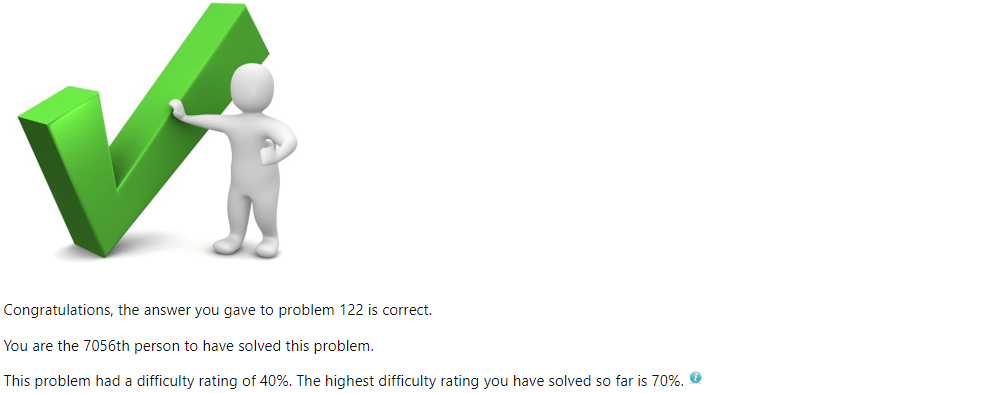

In [6]:
from IPython.display import Image
Image(filename='awards.png') 